In [17]:
#@title Default title text
from google.colab import drive
import pandas as pd
import numpy as np

import re #regex applies a regular expression to a string and returns the matching substrings. 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('french'))
import re

from nltk.tokenize import word_tokenize
import gensim

from tqdm import tqdm
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter



from sklearn.model_selection import train_test_split

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

In [18]:
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [19]:
train_data = pd.read_csv('/content/drive/MyDrive/datagram/data/train_datam.csv')
test_data = pd.read_csv('/content/drive/MyDrive/datagram/data/test_datam.csv') 

In [46]:

import re #regex applies a regular expression to a string and returns the matching substrings. 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('french'))
import re

from nltk.tokenize import word_tokenize
import gensim

from tqdm import tqdm
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter



from sklearn.model_selection import train_test_split

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
print('There are {} rows and {} columns in train'.format(train_data.shape[0],train_data.shape[1]))
print('There are {} rows and {} columns in train'.format(test_data.shape[0],test_data.shape[1]))



There are 161880 rows and 3 columns in train
There are 40002 rows and 3 columns in train


In [22]:
train_data.dtypes

Unnamed: 0      int64
category_id     int64
pname          object
dtype: object

In [23]:
test_data.dtypes

Unnamed: 0      int64
category_id     int64
pname          object
dtype: object

# Target distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

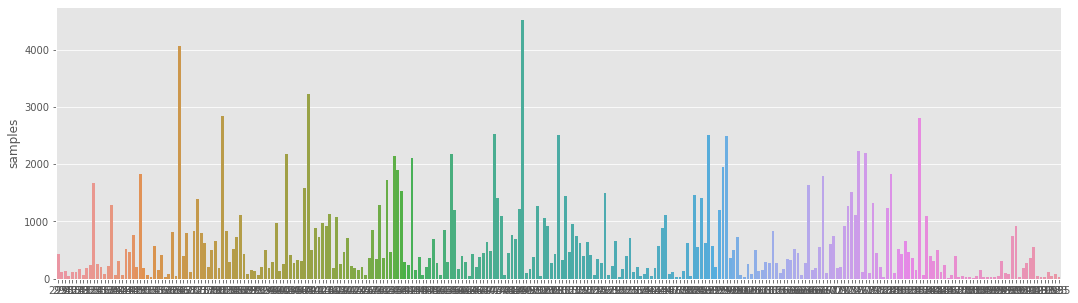

In [24]:
#Target variable distribution
x=train_data.category_id.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')


In [52]:
temp = train_data.groupby('category_id').count()['pname'].reset_index().sort_values(by='pname',ascending=False)
temp.style.background_gradient(cmap='Accent')

,category_id,pname
130,490,4517
34,366,4069
70,409,3232
46,382,2834
241,837,2814
122,473,2535
140,510,2516
182,590,2513
187,597,2500
224,716,2234


# Simple EDA for pnames

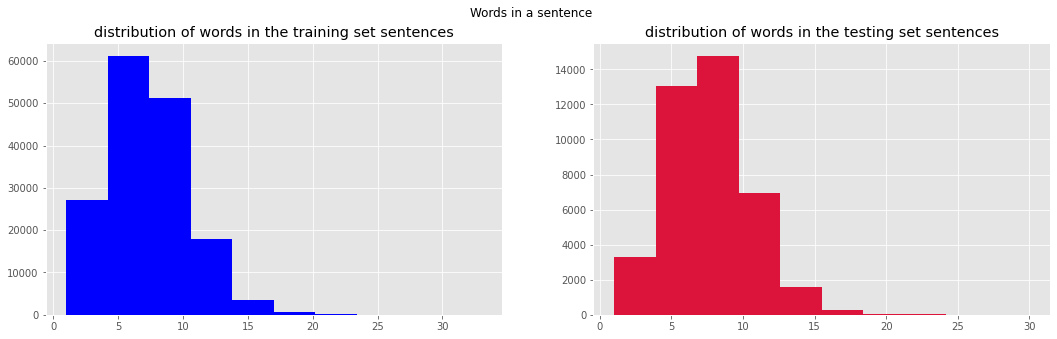

In [25]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,5))
tweet_len=train_data['pname'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('distribution of words in the training set sentences')
tweet_len=test_data['pname'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='CRIMSON')
ax2.set_title('distribution of words in the testing set sentences')
fig.suptitle('Words in a sentence')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'average word length')

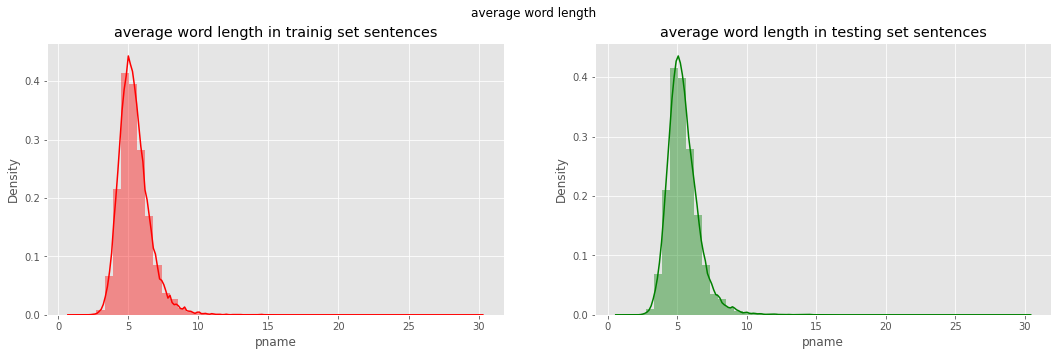

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,5))
word=train_data['pname'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('average word length in trainig set sentences')
word=test_data['pname'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('average word length in testing set sentences')
fig.suptitle('average word length')

In [27]:
corpus=[]
    
for x in train_data['pname'].str.split():
    for i in x:
        corpus.append(i)

<BarContainer object of 30 artists>

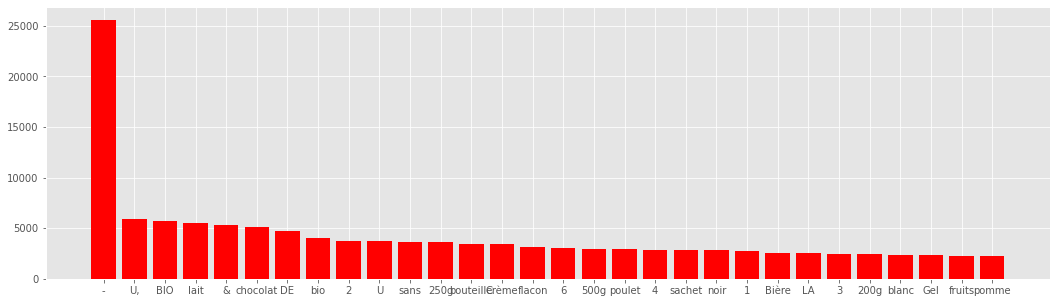

In [28]:
dic=defaultdict(int)
dic=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
    


x,y=zip(*top)
plt.rcParams["figure.figsize"] = (18,5)
plt.bar(x,y , color ='red')

In [53]:
train_data['temp_list'] = train_data['pname'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,de,60725
1,-,25573
2,à,14955
3,au,14049
4,et,11061
5,pour,6051
6,"U,",5941
7,BIO,5715
8,aux,5700
9,lait,5500


In [55]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('french')]
train_data['temp_list'] = train_data['temp_list'].apply(lambda x:remove_stopword(x))

In [56]:
top = Counter([item for sublist in train_data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,"U,",5941
2,BIO,5715
3,lait,5500
4,&,5289
5,chocolat,5150
6,DE,4728
7,bio,4047
8,2,3712
9,U,3706
10,sans,3662


<BarContainer object of 19 artists>

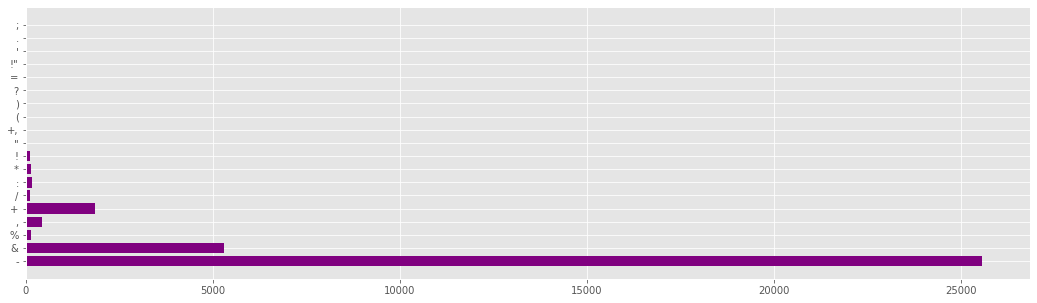

In [30]:
plt.figure(figsize=(18,5))
import string
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
      
x,y=zip(*dic.items())
plt.barh(x,y ,color = 'purple')



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


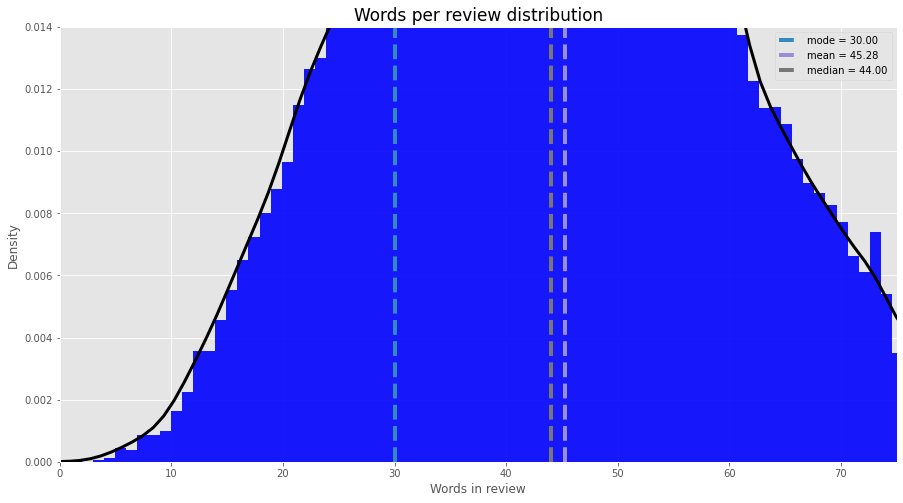

In [44]:
import seaborn as sb
train_data['review_lenght'] = np.array(list(map(len, train_data.pname)))
median = train_data['review_lenght'].median()
mean = train_data['review_lenght'].mean()
mode = train_data['review_lenght'].mode()[0]

fig, ax = plt.subplots(figsize=(15, 8))
sb.distplot(train_data['review_lenght'], bins=train_data['review_lenght'].max(),
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 3})
ax.set_xlim(left=0, right=np.percentile(train_data['review_lenght'], 95))
ax.set_xlabel('Words in review')
ymax = 0.014
plt.ylim(0, ymax)
ax.plot([mode, mode], [0, ymax], '--', label=f'mode = {mode:.2f}', linewidth=4)
ax.plot([mean, mean], [0, ymax], '--', label=f'mean = {mean:.2f}', linewidth=4)
ax.plot([median, median], [0, ymax], '--',
        label=f'median = {median:.2f}', linewidth=4)
ax.set_title('Words per review distribution', fontsize=17)
plt.legend()
plt.show()



# Missing values

In [60]:
train_data.isnull().sum()


Unnamed: 0       0
category_id      0
pname            0
review_lenght    0
temp_list        0
dtype: int64

In [ ]:
test_data.isnull().sum()